In [1]:
import pandas as pd
import csv
from time import time
from Apriori_FPGrowth import *

# IBM Data Preprocessing

In [2]:
df = pd.read_csv("test_data.txt",sep='[\s,]{2,20}',engine = 'python')
df.columns = ["customer_id","TID","item"]
df = df.drop(columns= "customer_id")
dataset1 = df
dataset1["item"] = dataset1["item"].astype(str)
print("rows: ",dataset1.shape[0])
print("unique value: ",len(dataset1["item"].unique()))   
print(dataset1)

rows:  4797
unique value:  52
      TID item
0       1  443
1       1  470
2       1  723
3       1  973
4       2    3
...   ...  ...
4792  828  111
4793  828  451
4794  828  487
4795  828  488
4796  828  523

[4797 rows x 2 columns]


# Kaggle BreadBasket Data Preprocessiong

In [3]:
df = pd.read_csv("BreadBasket_DMS.csv")
df = df.drop(columns = ["Date","Time"])
df.columns = ["TID","item"]
dataset2 = df
print("rows: ",dataset2.shape[0])
print("unique value: ",len(dataset2["item"].unique()))   
print(dataset2)

rows:  21293
unique value:  95
        TID           item
0         1          Bread
1         2   Scandinavian
2         2   Scandinavian
3         3  Hot chocolate
4         3            Jam
...     ...            ...
21288  9682         Coffee
21289  9682            Tea
21290  9683         Coffee
21291  9683         Pastry
21292  9684      Smoothies

[21293 rows x 2 columns]


# Apriori With IBM Data

In [4]:
t1 = time()
apriori_data1_itemsets,apriori_data1_rules = Apriori(dataset1.copy(),24)
print(apriori_data1_itemsets)
print(apriori_data1_rules)
t2 = time()
print("time: ",t2-t1)

     support            itemsets
133       24       (628, 487, 3)
52        24          (628, 451)
208       24  (628, 488, 3, 523)
106       24       (111, 628, 3)
116       24     (111, 628, 488)
..       ...                 ...
4        335              (487,)
3        335              (451,)
2        335              (111,)
1        340                (3,)
0        341              (523,)

[256 rows x 2 columns]
                                                  rules  confidence   support
0                                    ('3',) -> ('523',)    0.979412  0.402174
1                                    ('523',) -> ('3',)    0.976540  0.402174
2                                  ('111',) -> ('523',)    0.970149  0.392512
3                                  ('523',) -> ('111',)    0.953079  0.392512
4                                  ('451',) -> ('523',)    0.973134  0.393720
...                                                 ...         ...       ...
2507  ('111', '3', '451', '487', '

# FP-Growth With IBM Data

In [5]:
t1 = time()
fp_data1_itemsets,fp_data1_rules = fp_growth(dataset1.copy(),24)
print(fp_data1_itemsets)
print(fp_data1_rules)
t2 = time()
print("time: ",t2-t1)

     support            itemsets
181       24     (111, 628, 523)
183       24     (628, 487, 488)
184       24       (628, 487, 3)
185       24     (628, 487, 523)
192       24  (628, 488, 3, 523)
..       ...                 ...
225      335              (451,)
237      335              (487,)
229      335              (111,)
253      340                (3,)
255      341              (523,)

[256 rows x 2 columns]
                           rules  confidence   support
0           ('402',) -> ('705',)    0.333333  0.038647
1           ('705',) -> ('402',)    0.864865  0.038647
2     ('402',) -> ('705', '961')    0.312500  0.036232
3     ('705',) -> ('402', '961')    0.810811  0.036232
4     ('961',) -> ('705', '402')    0.789474  0.036232
...                          ...         ...       ...
2507    ('3', '487') -> ('523',)    0.978395  0.382850
2508    ('3', '523') -> ('487',)    0.951952  0.382850
2509    ('487', '523') -> ('3',)    0.978395  0.382850
2510          ('3',) -> ('523'

# Apriori With BreadBasket Data

In [6]:
t1 = time()
apriori_data2_itemsets,apriori_data2_rules = Apriori(dataset2.copy(),40)
print(apriori_data2_itemsets)
print(apriori_data2_rules)
t2 = time()
print("time: ",t2-t1)

     support                    itemsets
107       40     (Coffee, Cake, Cookies)
98        41  (Coffee, Alfajores, Bread)
88        42                (Soup, Cake)
85        42             (Brownie, Cake)
49        43          (Coffee, Frittata)
..       ...                         ...
29       856             (Coffee, Bread)
3        983                     (Cake,)
2       1350                      (Tea,)
1       3101                    (Bread,)
0       4533                   (Coffee,)

[115 rows x 2 columns]
                                  rules  confidence   support
0             ('Bread',) -> ('Coffee',)    0.276040  0.089812
1             ('Coffee',) -> ('Bread',)    0.188837  0.089812
2               ('Coffee',) -> ('Tea',)    0.104125  0.049523
3               ('Tea',) -> ('Coffee',)    0.349630  0.049523
4              ('Cake',) -> ('Coffee',)    0.527976  0.054454
..                                  ...         ...       ...
235  ('Sandwich',) -> ('Coffee', 'Tea')    0.07500

# FP-Growth With BreadBasket Data

In [7]:
t1 = time()
fp_data2_itemsets,fp_data2_rules = fp_growth(dataset2.copy(),40)
print(fp_data2_itemsets)
print(fp_data2_rules)
t2 = time()
print("time: ",t2-t1)

     support                    itemsets
64        40     (Coffee, Cake, Cookies)
42        41  (Coffee, Alfajores, Bread)
58        42             (Brownie, Cake)
29        42                (Soup, Cake)
5         43          (Frittata, Coffee)
..       ...                         ...
113      856             (Coffee, Bread)
101      983                     (Cake,)
108     1350                      (Tea,)
112     3101                    (Bread,)
114     4533                   (Coffee,)

[115 rows x 2 columns]
                               rules  confidence   support
0       ('Coffee',) -> ('Frittata',)    0.009486  0.004512
1       ('Frittata',) -> ('Coffee',)    0.530864  0.004512
2          ('Coffee',) -> ('Salad',)    0.013677  0.006505
3          ('Salad',) -> ('Coffee',)    0.626263  0.006505
4             ('Bread',) -> ('Jam',)    0.015801  0.005141
..                               ...         ...       ...
235  ('Coffee', 'Tea') -> ('Bread',)    0.148305  0.007344
236         

# Time Comparison in IBM data

100%|██████████| 6/6 [04:51<00:00, 48.62s/it]


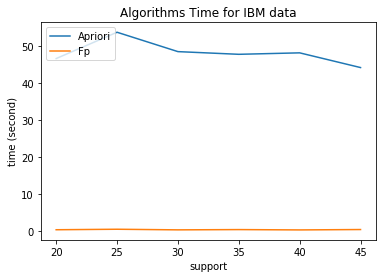

In [8]:
import matplotlib.pyplot as plt
support_try = [20,25,30,35,40,45]
apriori_time = []
fp_time = []
for i in tqdm(support_try):
    t1 = time()
    _,_ = Apriori(dataset1.copy(),32)
    t2 = time()
    apriori_time.append(t2-t1)
    t1 = time()
    _,_ = fp_growth(dataset1.copy(),32) 
    t2 = time()
    fp_time.append(t2-t1)

plt.plot(support_try,apriori_time)
plt.plot(support_try,fp_time)
plt.title('Algorithms Time for IBM data')
plt.ylabel('time (second)')
plt.xlabel('support')
plt.legend(['Apriori', 'Fp'], loc='upper left')
plt.show()

# Time Comparison in Bread Data

100%|██████████| 6/6 [04:30<00:00, 45.12s/it]


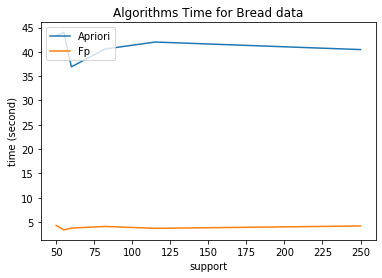

In [9]:
support_try = [50,55,60,82,115,250]
apriori_time = []
fp_time = []
for i in tqdm(support_try):
    t1 = time()
    _,_ = Apriori(dataset2.copy(),32)
    t2 = time()
    apriori_time.append(t2-t1)
    t1 = time()
    _,_ = fp_growth(dataset2.copy(),32) 
    t2 = time()
    fp_time.append(t2-t1)
plt.plot(support_try,apriori_time)
plt.plot(support_try,fp_time)
plt.title('Algorithms Time for Bread data')
plt.ylabel('time (second)')
plt.xlabel('support')
plt.legend(['Apriori', 'Fp'], loc='upper left')
plt.show()